## Lecture Notes
The majority of the focus should be on:

Intro to workflow of data scientists (20 min)
Split the rest between data preparation and feat. engineering, 50 min each.
We recommend showing slides and talk. No need to show students a lot of things , there will be plenty of time for that in the afternoon.

It's important that they see the value of different steps, so it's best to talk about the experience and for each step mention how it is/was in different projects we participated in.

#### A general description of a project flow for the data scientists
* Data Preparation:
* Outlier Detection
* Null Values Replacement
* Variable Transformation
* Feature Engineering

#### Logistic Regression
An ML algorithm used for classifying data into 2 labels. Much more detail will 

#                         Welcome to Data Preparation and Feature Engineering Lecture
![SegmentLocal](https://media.giphy.com/media/10a9ikXNvR9MXe/giphy.gif~c200 "segment")

### Steps in the ML Process

#### Data collection
→ Defining the problem and assembling a dataset (1)
#### Data preparation
→ Preparing your data (4)
#### Choose model

#### Train model
→ Developing a model that does better than a baseline (5)
#### Evaluate model
→ Choosing a measure of success (2)
→ Deciding on an evaluation protocol (3)
#### Parameter tuning
→ Scaling up: developing a model that overfits (6)
→ Regularizing your model and tuning your parameters (7)
#### Predict
It's not perfect, but helps us achieve the goal

[source: KDNuggets ]

### But Why are we doing this Entire Process ?
<img src="./DSProcess.jpg">

### Data Preprocessing Demo
demo source: https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/

data source: https://www.analyticsvidhya.com/wp-content/uploads/2016/07/loan_prediction-1.zip

#### Load Data

In [1]:
# Importing pandas
import pandas as pd
# Importing training data set
X_train=pd.read_csv('X_train.csv')
Y_train=pd.read_csv('Y_train.csv')
# Importing testing data set
X_test=pd.read_csv('X_test.csv')
Y_test=pd.read_csv('Y_test.csv')

In [20]:
# Non Standardized Data
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,log.predict(X_test))

C:\Users\Arunabh\miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Arunabh\miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6145833333333334

#### Look at the data

In [2]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


In [10]:
X_train.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

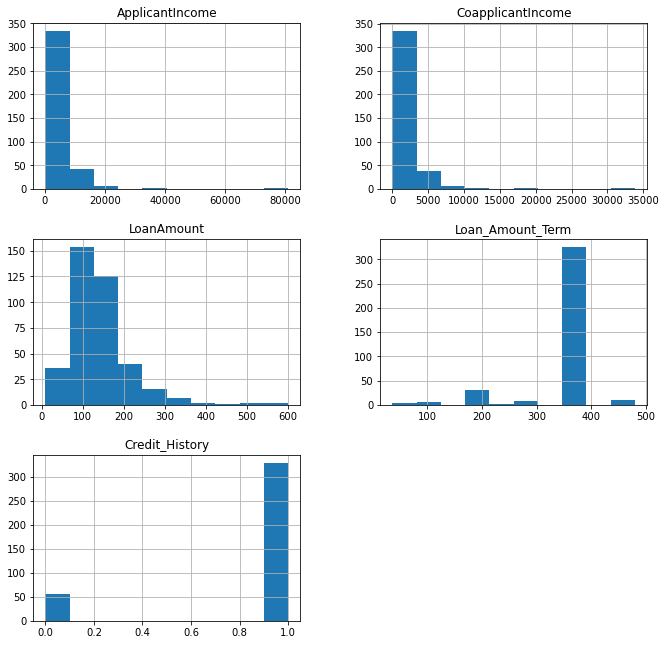

In [4]:
X_train.hist(figsize=[11,11])

#### What do we observe in the above data??

### Standardizing of Data.
One way of doing it is:
<img src="./minmax.jpg">

In [6]:
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_minmax,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,log.predict(X_test_minmax))

C:\Users\Arunabh\miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6354166666666666

### Feature Standardization
Standardization (or Z-score normalization) is the process where the features are rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1, where μ is the mean (average) and σ is the standard deviation from the mean. Standard scores (also called z scores) of the samples are calculated as follows : 

Z = (X - μ)/σ

In [8]:
# Standardizing the train and test data
from sklearn.preprocessing import scale
X_train_scale=scale(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_scale=scale(X_test[['ApplicantIncome', 'CoapplicantIncome',
               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
# Fitting logistic regression on our standardized data set

<AxesSubplot:>

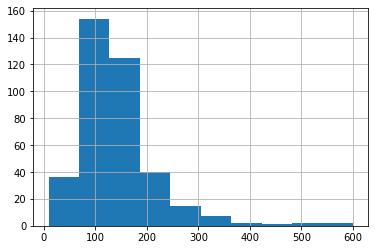

In [9]:
X_train['LoanAmount'].hist()

<AxesSubplot:>

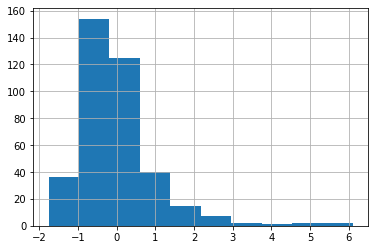

In [37]:
pd.Series(X_train_scale[:,2:3].ravel()).hist()

### Label Encoding

In [11]:
# Fitting a logistic regression model on whole data
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,log.predict(X_test))

ValueError: could not convert string to float: 'LP001032'

#### We got an error saying that it cannot convert string to float. We need to remove this error

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in X_test.columns.values:
    # Encoding only categorical variables
    if X_test[col].dtypes=='object':
    # Using whole data to form an exhaustive list of levels
        data=X_train[col].append(X_test[col])
        le.fit(data.values)
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])

In [13]:
# Standardizing the features
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)
# Fitting the logistic regression model
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,Y_train)
# Checking the models accuracy
accuracy_score(Y_test,log.predict(X_test_scale))

C:\Users\Arunabh\miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7395833333333334

In [16]:
X_train_scale[0]

array([-1.63381726,  0.45557345, -1.36589591, -0.74383384, -0.49674264,
       -0.40451992, -0.03769694, -0.59984568, -0.21938895,  0.27229341,
        0.40886826,  1.23149106])

### One Hot Encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
X_train_1=X_train
X_test_1=X_test
columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed',
          'Credit_History', 'Property_Area']
for col in columns:
    # creating an exhaustive list of all possible categorical values
    data=X_train[[col]].append(X_test[[col]])
    enc.fit(data)
    # Fitting One Hot Encoding on train data
    temp = enc.transform(X_train[[col]])
    # Changing the encoded features into a data frame with new column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
        .value_counts().index])
    # In side by side concatenation index values should be same
    # Setting the index values similar to the X_train data frame
    temp=temp.set_index(X_train.index.values)
    # adding the new One Hot Encoded varibales to the train data frame
    X_train_1=pd.concat([X_train_1,temp],axis=1)
    # fitting One Hot Encoding on test data
    temp = enc.transform(X_test[[col]])
    # changing it into data frame and adding column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
        .value_counts().index])
    # Setting the index for proper concatenation
    temp=temp.set_index(X_test.index.values)
    # adding the new One Hot Encoded varibales to test data frame
    X_test_1=pd.concat([X_test_1,temp],axis=1)

In [25]:
X_train_1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Gender_1',
       'Gender_0', 'Married_1', 'Married_0', 'Dependents_0', 'Dependents_2',
       'Dependents_1', 'Dependents_3', 'Education_0', 'Education_1',
       'Self_Employed_0', 'Self_Employed_1', 'Credit_History_1',
       'Credit_History_0', 'Property_Area_1', 'Property_Area_2',
       'Property_Area_0'],
      dtype='object')

In [27]:
X_train_1[['Gender_0','Gender_1']]

,Gender_0,Gender_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
379,1.0,0.0
380,1.0,0.0
381,1.0,0.0
382,1.0,0.0


#### Evaluate model based on one hot encoded data

In [28]:
# Standardizing the data set
X_train_scale=scale(X_train_1)
X_test_scale=scale(X_test_1)
# Fitting a logistic regression model
log=LogisticRegression(penalty='l2',C=1)
log.fit(X_train_scale,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,log.predict(X_test_scale))

C:\Users\Arunabh\miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.75

### Results
#### One hot Encoding is performing better than Label Ecnoding. But Why??
When we assign numbers like 0,1,2,3 to a categorical variable such as property_type which is semi urban,urban etc. it creates a problem because the machine learning algorithm interprets one property_type which gets assigned a value of 3 as better than something as a value of 2.

Ideally there is no better or inferior property_type. So, Label encoding creates relationships where there arent any and this creates noise in the data which is subsequently learnt by our algorithm and thus it's prediction is effected.


One Hot Encoding on the other hand creates new columns for each categorical value. So machine gets 1 for semi urban and 0 for everything else when property type is semi urban. So it automatically treats every value as equal. This give on hot encoding an edge over Label Encoding.
<img src="./label encdoing vs One Hot encoding.jpg">

### Outlier Detection
*** source: Outlier detection techniques and code referred from the following Towards Data Science Article - https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623 ***

#### 1. Standard Deviation
If distribution of data is mostly normal. Then you can set a threshold like 1 or 2 std deviations away from mean to consider a point as an outlier.
<img src="./normalstd.jpg">

In [29]:
import numpy as np
import matplotlib.pyplot as plt

import random
random.seed(1)



# multiply and add by random numbers to get some real values
data = np.random.randn(50000)  * 20 + 20

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print('lower limit is: '+str(lower_limit))
    print('upper limit is: '+str(upper_limit))
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(data)


lower limit is: -39.834036591015845
upper limit is: 80.04012748440049


[-49.0035027593311,
 -69.1239204839051,
 -41.81985464445792,
 -49.21319564342973,
 87.80046787007294,
 -63.540943638375865,
 82.03996605976401,
 88.37876549618323,
 88.00138039971576,
 -42.938627041433044,
 -42.4178962321065,
 94.98940132024,
 83.27678820032273,
 80.13794972521825,
 -40.76526491842663,
 88.09718812542326,
 86.56902853394092,
 -47.279922601847616,
 87.00144090918543,
 82.25958497760917,
 -40.147444665647356,
 -40.640841645170156,
 89.19848931325075,
 -43.21334541952318,
 82.13984086060907,
 84.4377948765339,
 91.17290733824964,
 83.3507480074537,
 80.32201638516707,
 90.2481409242649,
 82.25361968879497,
 -40.24570908001767,
 80.22666871711778,
 -44.92040541861084,
 -52.4039055304372,
 -49.36154811004978,
 85.82982843076202,
 -41.03039479677182,
 83.83612121681585,
 -41.18944429908378,
 84.21009058637827,
 81.40792344874097,
 93.79238159257851,
 -43.49139123763607,
 -48.04766263825901,
 85.5857684707984,
 -43.7058787034904,
 97.55549723027495,
 89.54389225385393,
 -52.1

#### 2. Box PLot

<AxesSubplot:>

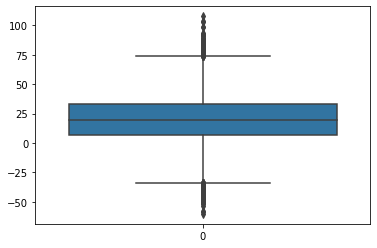

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data)


#### 3. isolation forest
The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

This algorithm works great with very high dimensional datasets and it proved to be a very effective way of detecting anomalies.

<img src="./isoforest.jpg">

In [30]:
from sklearn.ensemble import IsolationForest
import numpy as np
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

clf = IsolationForest(  max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(random_data)
preds

array([-1,  1, -1, ...,  1,  1,  1])

### Handling Missing Values
source article by code garage:https://medium.com/bycodegarage/a-comprehensive-guide-on-handling-missing-values-b1257a4866d1

In [31]:
### loading titanic data
titanic_data = pd.read_csv('./titanic.csv')

In [57]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### There are two types of missing values in every dataset:

* Visible errors: blank cells, special symbols like NA (Not Available), NaN (Not a Number), etc.
* Obscure errors: non-corrupt but invalid values. For example, a negative salary or a number for a name.

In [32]:
# Summary Statistics of the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Age has a count of 715 whereas others are 891 rows. This means age has missing values. Let us count  missing values in each column in the dataframe.

In [33]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
# Number of non - null values in the data can also be found using info() method.
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Droppin missing values

In [35]:
# Deleting rows
mod_df = titanic_data.dropna()
# No of non - null values in the modified data
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


#### Imputing with Mean/Median/Mode/Backward fill/ Forward fill
As we see dropping rows is not always a good idea. Dropping row values may cause loss of a lot of data.

In [64]:
#Let’s replace null values in the Age column by pandas.
# Mean of Age column
titanic_data['Age'].mean()

29.69911764705882

In [65]:
titanic_data['Age'].median()

28.0

In [66]:
titanic_data['Age'].mode()

0    24.0
dtype: float64

In [36]:
# Replace Null Values (np.nan) in Age column with mean
titanic_data['Age'] = titanic_data['Age'].replace(np.nan, titanic_data['Age'].mean())


In [37]:
# Checking for null values in Age column
titanic_data['Age'].isnull().sum()


0

In [38]:
# Alternate ways to impute null values with median and mode
titanic_data = pd.read_csv('./titanic.csv')
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mode())

#### using simple imputer from scikit learn

In [39]:
from sklearn.impute import SimpleImputer
new_df = pd.read_csv('./titanic.csv')
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
new_df['Age'] = imputer.fit_transform(new_df[['Age']])

In [40]:
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### For Categorical Values

In [45]:
new_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

The most frequent value in the Embarked column is S. So replacing all null values in the Embarked column with most frequent value S.

In [46]:
new_df['Embarked'] = new_df['Embarked'].fillna(new_df['Embarked'].value_counts().index[0])

#### Moving on from missing values to variable transformation now

#### Logarithmic transformation
When the value distribution has long-tailed distribution (e.g. individual incomes, individual medical costs, etc.), logarithmic transformations may adjust data distribution to less skewed — hopefully, Gaussian-like distribution.

#### Box-Cox Transformation
Box-Cox transformation is the transformation between log(x) transformation and x-1 transformation depending on the value of lambda. PowerTransformer in scikit-learn preprocessing module can handle this transformation and automatically select lambda to make the data the most Gaussian-like.
<img src="./boxcox.jpg">

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

train_data = pd.DataFrame({'var1':[1, 0.1, 1.5, 2]})

pt = PowerTransformer(method='box-cox')
pt.fit(train_data)
train_data_trans = pt.transform(train_data)
print(train_data_trans)
# [[-0.11830534]
#  [-1.55167268]
#  [ 0.53175441]
#  [ 1.13822361]]

print(pt.lambdas_) # Automatically selected 
# [0.79614218]
print(np.mean(train_data_trans)) 
#-5.551115123125783e-17
print(np.std(train_data_trans)) 
#0.9999999999999998

[[-0.11830534]
 [-1.55167268]
 [ 0.53175441]
 [ 1.13822361]]
[0.79614218]
0.0
0.9999999999999999


### Feature Engineering
What is feature engineering?

Feature engineering is a process of transforming the given data into a form which is easier to interpret. 
All transformations we learnt above are engineer features.

### Examples 
#### Decompose Categorical Attributes
Imagine you have a categorical attribute, like “Item_Color” that can be Red, Blue or Unknown.

Unknown may be special, but to a model, it looks like just another colour choice. It might be beneficial to better expose this information.

You could create a new binary feature called “Has_Color” and assign it a value of “1” when an item has a color and “0” when the color is unknown.

Going a step further, you could create a binary feature for each value that Item_Color has. This would be three binary attributes: Is_Red, Is_Blue and Is_Unknown.

These additional features could be used instead of the Item_Color feature (if you wanted to try a simpler linear model) or in addition to it (if you wanted to get more out of something like a decision tree).

#### Decompose a Date-Time
A date-time contains a lot of information that can be difficult for a model to take advantage of in it’s native form, such as ISO 8601 (i.e. 2014-09-20T20:45:40Z).

If you suspect there are relationships between times and other attributes, you can decompose a date-time into constituent parts that may allow models to discover and exploit these relationships.

For example, you may suspect that there is a relationship between the time of day and other attributes.

You could create a new numerical feature called Hour_of_Day for the hour that might help a regression model.

You could create a new ordinal feature called Part_Of_Day with 4 values Morning, Midday, Afternoon, Night with whatever hour boundaries you think are relevant. This might be useful for a decision tree.

You can use similar approaches to pick out time of week relationships, time of month relationships and various structures of seasonality across a year.

Date-times are rich in structure and if you suspect there is time dependence in your data, take your time and tease them out

#### Reframe Numerical Quantities
Your data is very likely to contain quantities, which can be reframed to better expose relevant structures. This may be a transform into a new unit or the decomposition of a rate into time and amount components.

You may have a quantity like a weight, distance or timing. A linear transform may be useful to regression and other scale dependent methods.

For example, you may have Item_Weight in grams, with a value like 6289. You could create a new feature with this quantity in kilograms as 6.289 or rounded kilograms like 6. If the domain is shipping data, perhaps kilograms is sufficient or more useful (less noisy) a precision for Item_Weight.

The Item_Weight could be split into two features: Item_Weight_Kilograms and Item_Weight_Remainder_Grams, with example values of 6 and 289 respectively.

There may be domain knowledge that items with a weight above 4 incur a higher taxation rate. That magic domain number could be used to create a new binary feature Item_Above_4kg with a value of “1” for our example of 6289 grams.

You may also have a quantity stored as a rate or an aggregate quantity for an interval. For example, Num_Customer_Purchases aggregated over a year.

### Activity 

In [48]:
groceries = pd.read_csv('./Groceries.csv')

#### From Groceries Dataset perform the following:
1. Check for missing values
2. Try feature engineering
3. Anything else you have learnt so far...

In [49]:
groceries

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
